In [1]:
from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Cada campo

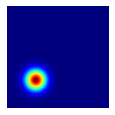

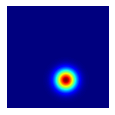

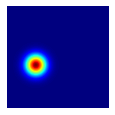

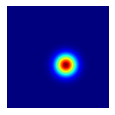

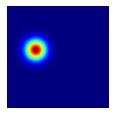

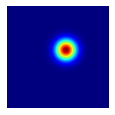

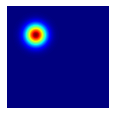

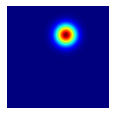

In [5]:
lambd = 780*nm;                
k     = 2*np.pi/lambd
w0    = 0.15*mm;                
delta = 0.15*mm; 
Twist =  1 
   
mu_0  =  Twist/(k*delta**2)

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Lcoh = 4

alpha = ( 1 + np.sqrt( 1 - (k*mu_0*delta**2)**2) )/( k*mu_0*delta )**2
aux2 = np.exp(1j*np.zeros((n,n,Lcoh*Lcoh)))

# Coherent sum
ii = 0
for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):

        v_x = (jj)*2*4/((np.sqrt(2*alpha)*(Lcoh -1))) - 4/np.sqrt(2*alpha)   # N = número de modos somados coerentemente
        v_y = (kk)*2*4/((np.sqrt(2*alpha)*(Lcoh -1))) - 4/np.sqrt(2*alpha)

        p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
        H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
        H_r = np.exp(-(xx**2 + yy**2)*( alpha*(mu_0*k)**2/2 + 1/(4*w0**2) ))
      
        Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase
          
        aux2[:,:,ii] = Holograma 
        ii+=1
#-------------------------------------
for i in range(0,Lcoh*Lcoh,Lcoh//2) : 
    fig, ax = plt.subplots(figsize=(4,4))

    plt.subplot(1,2,1)
    F = Begin(2*abs(x[0]),lambd,n);

    F.field = aux2[:,:,i]
    fase = Phase(F)
    ASD = abs(aux2[:,:,i])**2
    ASD = ASD/ASD.max()

    plt.imshow(Intensity(1,F),cmap='jet')
    plt.imshow(ASD,cmap='jet')
    #plt.title("Intensidade")
    plt.axis("off")
    #plt.colorbar()

    #plt.subplot(1,2,2)
    #plt.imshow(fase,cmap='jet')
    #plt.title("Fase")
    #plt.axis("off")
    #plt.colorbar()
    plt.show()

### Cada mascara 

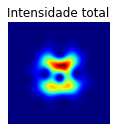

In [15]:
lambd = 780*nm;                
k     = 2*np.pi/lambd
w0    = 0.15*mm;                
delta = 0.15*mm; 
Twist =  1 
mu_0  =  Twist/(k*delta**2)

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 1
Lcoh = 4

#-------------------------------------

alpha = ( 1 + np.sqrt( 1 - (k*mu_0*delta**2)**2) )/( k*mu_0*delta )**2

aux2 = np.exp(1j*np.zeros((n,n,Linc)))
aux3 = np.zeros((n,n,Linc))

for ii in range(0,Linc):
  u = np.zeros_like(xx);
# Coherent sum
  for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):
      v_x = (jj)*2*4/((np.sqrt(alpha)*(Lcoh -1))) - 4/np.sqrt(alpha)   # N = número de modos somados coerentemente
      v_y = (kk)*2*4/((np.sqrt(alpha)*(Lcoh -1))) - 4/np.sqrt(alpha)

      p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
      H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
      H_r = np.exp(-(xx**2 + yy**2)*( alpha*(mu_0*k)**2/2 + 1/(4*w0**2) ))
      
      Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase  
      u = u + Holograma 
  # normalization
  u = u/u.max()
    
  aux2[:,:,ii] = u;
  aux3[:,:,ii] = abs(u)**2
#-------------------------------------
fig, ax = plt.subplots(figsize=(4,4))

plt.subplot(1,2,1)
#F = Begin(2*abs(x[0]),lambd,n);

#F.field = aux2[:,:,0]
#fase = Phase(F)

#plt.imshow(Intensity(1,F),cmap='jet')
#plt.axis("off")
#plt.title("Intensidade total")
#plt.colorbar()

#plt.subplot(1,2,2)
#plt.imshow(fase,cmap='jet')
#plt.title("Fase",)
#plt.axis("off")
#plt.colorbar()
#----------------------------------------------------
plt.imshow(np.sum( aux3 ,2),cmap='jet')
plt.axis("off")
plt.title("Intensidade total")
#plt.colorbar()
plt.show()

### Doc no eixo x

In [5]:
lambd = 780*nm;                
k     = 2*np.pi/lambd
sigma = 0.15*mm
w0    = sigma
delta = 0.05*mm;
Twist =  1 
mu_0  =  Twist/(k*delta**2)
alpha = ( 1 + np.sqrt( 1 - (k*mu_0*delta**2)**2) )/( k*mu_0*delta )**2


n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 200
iii = [4,8,12,16,20]
A = []

p_v = 1/( np.pi*delta )

for Lcoh in iii: 
  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  for ii in range(0,Linc):
    u = np.zeros_like(xx)
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj)*2*8/((np.sqrt(alpha)*(Lcoh -1))) - 8/np.sqrt(alpha)   # N = número de modos somados coerentemente
        v_y = (kk)*2*8/((np.sqrt(alpha)*(Lcoh -1))) - 8/np.sqrt(alpha)

        p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
        H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
        H_r = np.exp(-(xx**2 + yy**2)*( alpha*(mu_0*k)**2/2 + 1/(4*w0**2) ))
      
        Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase  
        u = u + Holograma  
    u = u/u.max()
    Fin = Begin(2*abs(x[0]),lambd,n);
    Fin.field = u
    Fout = Forvard(0*cm,Fin);
    aux2[:,:,ii] = u;
    aux3[:,:,ii] = Intensity(0,Fout);
  #-------------------------------------
  ref = [0,0]                        
  index = np.where((xx==ref[0])*(yy==ref[1])==True)        

  mu = np.zeros_like(aux2[:,0,0])            
  intMap = np.sum(aux3,2)           
  for ii in range(0,n):
    jj = index[1]
    mu[ii] = np.sum(np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
  
  A.append( abs(mu/mu.max())**2 )
#-------------------------------------

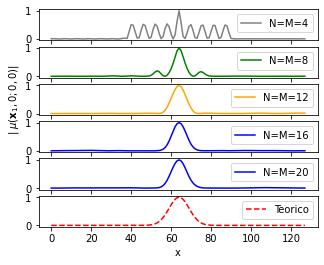

In [16]:
mu_x_000 = np.exp( -x**2/(2*delta**2) )
fig, ax = plt.subplots(figsize=(5,4))

plt.subplot(6,1,1)
plt.plot( A[0] ,color="grey",label='N=M=4')
plt.legend(loc=1)

plt.subplot(6,1,2)
plt.plot( A[1] ,color="green",label='N=M=8')
plt.legend(loc=1)

plt.subplot(6,1,3)
plt.plot( A[2],color="orange",label='N=M=12' )
plt.legend(loc=1)
plt.ylabel("| $\mu(\mathbf{x}_1,0;0,0)$|", fontsize=10)
plt.subplot(6,1,4)
plt.plot( A[3],color="blue",label='N=M=16')
plt.legend(loc=1)

plt.subplot(6,1,5)
plt.plot( A[4],color="blue",label='N=M=20' )
plt.legend(loc=1)

plt.subplot(6,1,6)
plt.plot( mu_x_000,"--",color="red",label='Teorico')
plt.legend(loc=1)
plt.xlabel("x")
plt.show()

### Intensidade 

In [18]:
#______ CAMPO _______
lambd = 780*nm;                
k     = 2*np.pi/lambd
w0    = 0.15*mm;                
delta = 0.15*mm; 
Twist =  1
mu_0  =  Twist/(k*delta**2)
alpha = ( 1 + np.sqrt( 1 - Twist**2) )/( k*mu_0*delta )**2

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 1
Lcoh = 4

aux2 = np.exp(1j*np.zeros((n,n,Linc)))
aux3 = np.zeros((n,n,Linc))
awd = 8 # deve ser + q 6
for ii in range(0,Linc):
  u = np.zeros_like(xx);
# Coherent sum
  for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):
      v_x = (jj)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)   # N = número de modos somados coerentemente
      v_y = (kk)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)

      p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
      H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
      H_r = np.exp(-(xx**2 + yy**2)*(  alpha*(mu_0*k)**2/2 + 1/(4*w0**2) )) 
       
      Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase  
      u = u + Holograma  
  # normalization
  u = u/u.max()
    
  aux2[:,:,ii] = u
  aux3[:,:,ii] = abs(u)**2
#-------------------------------------

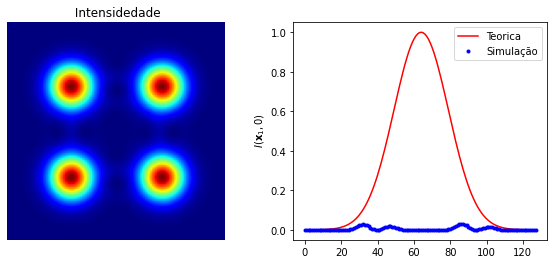

In [19]:
A = np.sum( aux3 ,2)
A = A/A.max()

Int_T =  np.exp( - x**2/(2*w0**2 )  )

plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.title(" Intensidedade")
#plt.title("b)", loc = 'left')
plt.imshow(A,cmap='jet')
plt.axis("off")

plt.subplot(1,2,2)
plt.ylabel(" $I(\mathbf{x}_1,0)$")
plt.plot(Int_T,'r',label='Teorica')
plt.plot(A[:,64],'b.',label='Simulação')
plt.legend(loc=1)
#plt.axis("off")

plt.show()

### Intensidades com diferentre valores de N,M

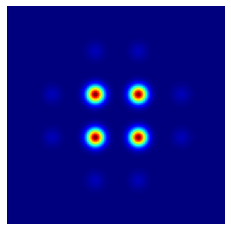

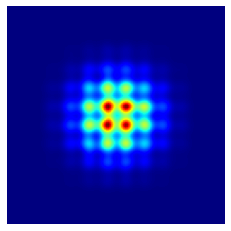

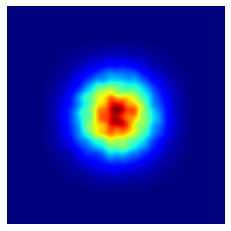

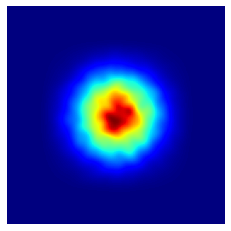

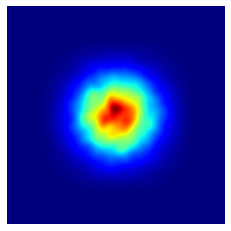

In [31]:
for ikj in [4,8,12,16,20]:
  lambd = 780*nm;                
  k     = 2*np.pi/lambd
  w0    = 0.15*mm;                
  delta = 0.05*mm; 
  Twist =  1
  mu_0  =  Twist/(k*delta**2)
  alpha = ( 1 + np.sqrt( 1 - Twist**2) )/( k*mu_0*delta )**2

  n  = 2**7;   
  dx = 10*um;                              
  x  = np.arange(-n/2,n/2,1)*dx
  [xx,yy] = np.meshgrid(x,x);   

  Linc = 200
  Lcoh = ikj

  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  awd = 8 # deve ser + q 6
  for ii in range(0,Linc):
    u = np.zeros_like(xx);
  # Coherent sum
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)   # N = número de modos somados coerentemente
        v_y = (kk)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)

        p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
        H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
        H_r = np.exp(-(xx**2 + yy**2)*(  alpha*(mu_0*k)**2/2 + 1/(4*w0**2) )) 
        
        Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase  
        u = u + Holograma  
    # normalization
    u = u/u.max()
      
    aux2[:,:,ii] = u
    aux3[:,:,ii] = abs(u)**2
  #-------------------------------------

  A = np.sum( aux3 ,2)
  A = A/A.max()

  Int_T =  np.exp( - x**2/(2*w0**2 )  )

  plt.subplots(figsize=(10,4))

  plt.subplot(1,2,1)
  #plt.title(" Intensidedade")
  #plt.title("b)", loc = 'left')
  plt.imshow(A,cmap='jet')
  plt.axis("off")

  plt.show()

### DOC r

In [1]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        

mu = np.zeros_like(aux2[:,:,1])            # aux4 = cada um dos campos dentro da soma incoerente (no plano em que se vai calcular o DOC=mu, ou seja, depois de propagar, fendas, etc)
intMap = np.sum(aux3,2)                    # aux3 é a intensidade de aux4. Ou seja, intMap é a imagem do feixe parcialmente coerente (aquela que costumamos olhar)
# loop para cada ponto do plano/grade. O DOC vai ser calculado de cada ponto em relação ao ponto de referência (ver eq 29 do artigo "Three modal decompositions of Gaussian Schell-model sources: comparative analysis")
for ii in range(0,n):
    for jj in range(0,n):
        mu[ii,jj] = np.sum(np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
# só para mostrar o resultado do DOC

img = abs(mu) 
img = img/img.max()
BB = np.exp(-x**2/(2*delta**2) )

plt.subplots(1,2,figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img,cmap = "jet"); 
plt.title('|$\mu(\mathbf{r},0)$|')
plt.axis("off")
plt.colorbar(orientation = "vertical")


plt.subplot(1,2,2)
plt.plot(img[64,:],"b.")
plt.ylabel("| $\mu(\mathbf{x}_1,0;0,0)$|")
plt.plot(BB,"r",label='Teorico')

plt.show()

NameError: name 'np' is not defined

### interferencia

In [ ]:
"""%USER INPUT: slit parameters"""
d0 = .05*mm; # distance between slits
a0 = d0/3; # slit width

# make slit
fslit = (np.ones_like(xx)*(abs(xx+(d0/2))<=a0/2) +
         np.ones_like(xx)*(abs(xx-(d0/2))<=a0/2));

# passando pelas fendas --> soma incoerente
F = Begin(abs(x[0])*2,lambd,n )        # Criando o Campo no Lpipe
slitSS =[0]
FF = F.copy(F)
for i in range(Linc):

  FF.field = aux2[:,:,i]*fslit
  FF1      = Forvard(1*cm,FF)
  slitSS  += Intensity(FF1)
plt.figure(figsize=(10,5))
plt.imshow(slitSS,cmap = "jet");plt.colorbar();plt.show()

#### Interferencia variando parametros 

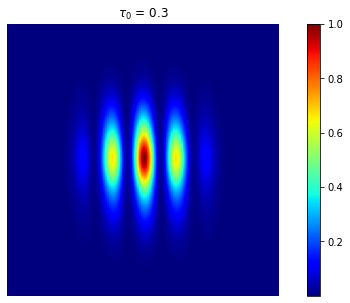

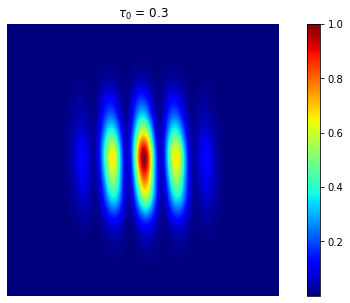

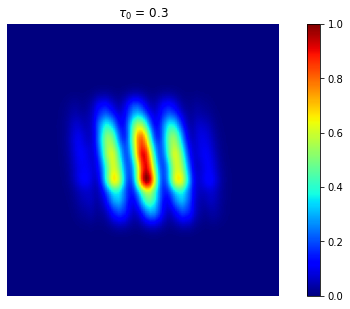

In [83]:
for ikj in [15,10,5]:
  lambd = 780*nm;                
  k     = 2*np.pi/lambd
  w0    = 0.15*mm;                
  delta = (ikj/100)*mm; 
  Twist =  0.3
  mu_0  =  Twist/(k*delta**2)
  alpha = ( 1 + np.sqrt( 1 - Twist**2) )/( k*mu_0*delta )**2

  n  = 2**7;   
  dx = 10*um;                              
  x  = np.arange(-n/2,n/2,1)*dx
  [xx,yy] = np.meshgrid(x,x);   

  Linc = 250
  Lcoh = 16

  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  awd = 8 # deve ser + q 6
  for ii in range(0,Linc):
    u = np.zeros_like(xx);
  # Coherent sum
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)   # N = número de modos somados coerentemente
        v_y = (kk)*2*awd/(np.sqrt(alpha)*(Lcoh -1)) - awd/np.sqrt(alpha)

        p   = np.exp(-alpha*(v_x**2 + v_y**2))*alpha/np.pi # Função peso
        H_v = np.exp(-1j*(xx*v_x + yy*v_y) + alpha*mu_0*k*(xx*v_y - yy*v_x))#Kernel +alpha*mu_0(xx*v_y-yy*v_x )
        H_r = np.exp(-(xx**2 + yy**2)*(  alpha*(mu_0*k)**2/2 + 1/(4*w0**2) )) 
        
        Holograma =  np.sqrt(p)*H_v*H_r*np.exp(1j*2*np.pi*np.random.random(1)) # Peso*Kernel*RandomFase  
        u = u + Holograma  
    # normalization
    u = u/u.max()
      
    aux2[:,:,ii] = u
    aux3[:,:,ii] = abs(u)**2
  #-------------------------------------

  # passando pelas fendas --> soma incoerente
  F = Begin(abs(x[0])*2,lambd,n )        # Criando o Campo no Lpipe
  slitSS =[0]
  FF = F.copy(F)
  for i in range(Linc):
    FF.field = aux2[:,:,i]*fslit
    FF1      = Forvard(1*cm,FF)
    slitSS  += Intensity(FF1)
  slitSS = slitSS/slitSS.max()
  plt.figure(figsize=(8,4))
  plt.title(f'$\u03C4_0$ = {Twist}')
  plt.imshow(slitSS,cmap = "jet");
  plt.colorbar();
  plt.axis("off")

  plt.show()
#print(f" franjas de interferenica com L = {Linc}, N,M = {Lcoh} e Twist = {Twist}")

### Lente

<function matplotlib.pyplot.show(close=None, block=None)>

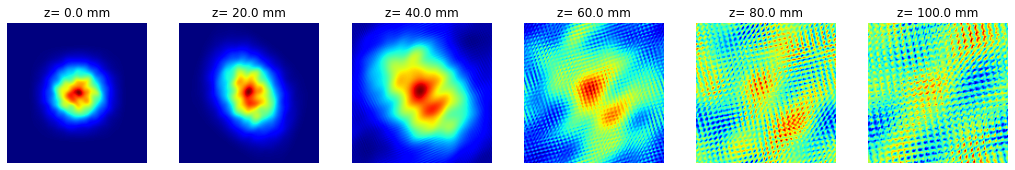

In [7]:
# passando por lente cilíndrica --> soma incoerente
# OBS: os valores de distância focal foram ajustados até reproduzir qualitativamente (espelhamento em relação à vertical) a figura 7

# sequência de propagação
dzPar = np.arange(0*mm,110*mm,step=20*mm)
fCyl = 50*mm
fSph = 100*mm

F = Begin(abs(x[0])*2,lambd,n)        # Criando o Campo no Lpipe
SS = np.zeros((n,n,dzPar.size))
FF = F.copy(F)

for j in range(dzPar.size):
  aux = [0]
  for i in range(Linc):
    FF.field = aux2[:,:,i]
    FF = CylindricalLens(FF,fCyl)
    FF = Lens(FF,fSph)
    FF1 = Forvard(dzPar[j],FF)
    aux += Intensity(FF1)
  SS[:,:,j] = aux

# Mostrando o resultado
fig, ax = plt.subplots(figsize=(18,18))
for ii in range(dzPar.size):
    plt.subplot(6,6,ii+1)
    plt.title('z= %3.1f mm' % (dzPar[ii]*1e3) )
    plt.imshow(SS[:,:,ii],cmap='jet');plt.axis('off')
plt.show